In [333]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score, recall_score, f1_score, precision_score, accuracy_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

In [347]:
def read_data():
#     df = pd.read_csv('data/initial_data.csv')
    df = pd.read_csv('voting_data_2000.csv')
    current = pd.read_csv('data/initial_data.csv')
    current_names = current['name'].unique()
    df = df[df['name'].isin(current_names)]
    df = df.set_index('name')
    return df

In [348]:
def format_data(df):
    df = df.iloc[:,6:]
    for col in df.columns:
        temp = df[col].apply(lambda x: x if x in ['Yes','No','Not Voting'] else 0)
        temp = np.where(df[col] == 'Yes',1,temp)
        temp = np.where(df[col] == 'No',-1,temp)
        temp = np.where(df[col] == 'Not Voting',0,temp)
        df[col] = temp
        df[col].fillna(0)
    return df

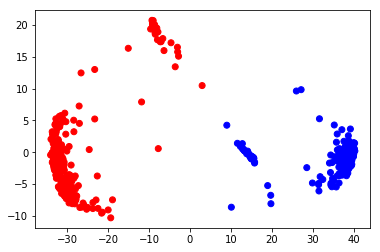

In [349]:
def plot_PCA_reduction(X, with_labels=False, labels=None):
    fig = plt.figure(1, figsize=(12, 12))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    plt.cla()
    if with_labels:
        for label in labels.unique():
            ax.text3D(X[labels == label, 0].mean(),
                      X[labels == label, 1].mean() + 1.5,
                      X[labels == label, 2].mean(), str(label),
                      horizontalalignment='center',
                      bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
        colours = np.where(labels==labels.unique()[0],'r','b')
        ax.scatter(X[:, 0], X[:, 1], X[:, 2],c=colours, cmap=plt.cm.spectral,
                   edgecolor='k')
    else:
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], cmap=plt.cm.spectral,
                   edgecolor='k')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    plt.show()
    pass


if __name__ == '__main__':
    # Read in data
    df = read_data()
    # Format data and take care of missing values
    votes = format_data(df)
    # Experiment with PCA
    pca = PCA(n_components=4)
    reduced = pca.fit_transform(votes)
    # plot_PCA_reduction(reduced, with_labels=True, labels=df['party'])
    # Find axis with D + R split = axis 0 as expdcted
    # Project onto remainig axis
    X = reduced[:,0]
    y = reduced[:,1]
    colours = df['party'].apply(lambda x: 'r' if x=='R' else 'b')
    plt.scatter(X, y , c=colours)
    plt.show()
    # res = pd.DataFrame({'x':X, 'y':y, 'z':colours})
    # res.to_csv('pca_results.csv')
    # Identify TOP climate hawk
    ## Calculate typical climmate hawk vector
    # Identify TOP climate denier
    ## Calculate typical climate denier

In [350]:
pca.explained_variance_ratio_

array([ 0.7515604 ,  0.03191503,  0.02810739,  0.01454082])

In [351]:
pca.components_.shape

(4, 1865)

In [339]:
bill_data = pd.read_csv('bill_data_2000.csv')

In [340]:
# get voting record data
df = read_data()
bill_names = np.array(format_data(df).columns.values)

In [344]:
# axis 1
A0 = pca.components_[1]
A0_df = pd.DataFrame({'coefficient': A0, 'bill': bill_names}).sort_values('coefficient', axis=0, ascending=False)

In [345]:
# join with bill data table
A0_df['bill_slug'] = A0_df['bill'].apply(lambda x: x.split('-')[0])
A0_results = A0_df.set_index('bill_slug').join(bill_data.set_index('bill_slug'))[['coefficient', 'bill', 'summary', 'subjects']]
A0_results = A0_results.drop_duplicates('bill').sort_values('coefficient', ascending=False)

In [346]:
# take top 5 bills
pd.options.display.max_colwidth = 100
A0_results[0:10]

,coefficient,bill,summary,subjects
bill_slug,,,,
hr3354_x.8,0.041517,hr3354_x.8,NaN,NaN
hr3354_x.2,0.040859,hr3354_x.2,NaN,NaN
hres616_y,0.040750,hres616_y,NaN,NaN
hres619_y,0.040647,hres619_y,NaN,NaN
hres619_x,0.040618,hres619_x,NaN,NaN
hres414_y,0.040567,hres414_y,NaN,NaN
hres468_x,0.040535,hres468_x,NaN,NaN
hres414_x,0.040505,hres414_x,NaN,NaN
hres440_y,0.040475,hres440_y,NaN,NaN
